## Preprocessing

In [1]:
import pandas as pd
import numpy as np
#
import warnings
warnings.filterwarnings("ignore")
#

In [2]:
path_to_file = "../data/Component_Faults_Data.csv"
df = pd.read_csv(path_to_file)

In [3]:
x = df.iloc[:, :48].values
y = df["class"].values.reshape(-1, 1)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

## Helper class for building, training, testing NN, and plotting results

In [7]:
class NN:

    # params for building model
    input_layer_dim = 48
    output_layer_dim = 11

    def build(self, number_of_hidden_layers=1, number_of_units_per_layer=48,
              activation_function='relu', loss_function='categorical_crossentropy', optimizer='sgd'):

        from keras.models import Sequential
        from keras.layers import Dense

        model = Sequential()
        # Input layer
        model.add(Dense(number_of_units_per_layer, input_dim=self.input_layer_dim, activation=activation_function))
        # Hidden layer
        for i in range(number_of_hidden_layers):
            model.add(Dense(number_of_units_per_layer, activation=activation_function))
        # Output layer
        model.add(Dense(self.output_layer_dim, activation='softmax'))

        model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

        return model

    @staticmethod
    def train(model, epochs=100, batch_size=64):
        # xtrain and ytrain are from preprocessing
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
        return model, history
    
    @staticmethod
    def test(model):
        y_pred = model.predict(x_test)
        # Converting predictions to label
        pred = list()
        for i in range(len(y_pred)):
            pred.append(np.argmax(y_pred[i]))
        # Converting one hot encoded test label to label
        test = list()
        for i in range(len(y_test)):
            test.append(np.argmax(y_test[i]))

        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(pred, test)
        return accuracy

In [8]:
# nn = NN()
#res_acc_per_param = {}
#
#for j in range(4, 6):
#    model = nn.build(number_of_hidden_layers=j, number_of_units_per_layer=48)
#    trained_model, history = nn.train(model, x_train, y_train, batch_size=64, epochs=100)
#    accuracy = nn.test(trained_model)
#    
#    res_acc_per_param.update({j: accuracy})

## Newer Solution

In [20]:
# TODO set for param only single
    
    
class NeuralNetworkParameterTester:

    # params for building model
    config = {
        'input_layer_dim': 48,
        'output_layer_dim': 11,
        'number_of_hidden_layers': 1,
        'number_of_units_per_layer': 10,
        'activation_function': 'relu',
        'loss_function': 'categorical_crossentropy',
        'optimizer': 'sgd'}
    
    test_param_name = None  # Name of the div parameter
    
    result = {}  # Result of the test
    
    # schema of result
    # schema = {
    #     0: [
    #        'model': model,
    #        'acurracy': 0.923,
    #        'params': {
    #            'input_layer_dim': 48,
    #            'output_layer_dim': 11,
    #            'activation_function': 'relu',
    #            'loss_function': 'categorical_crossentropy',
    #            'optimizer': 'sgd',
    #            'number_of_hidden_layers': 1,
    #            'number_of_units_per_layer': 10}
    #    ],
    #    1: [
    #        ........
    #        ........
    #    ]
    # }
    
    
    
    def __init__(self, param_name, param_val_list):
        
        # TODO check if param_name and param_val_list right data type
        
        self.test_param_name = param_name
        self.config[self.test_param_name] = param_val_list
        
    def run(self):
        
        for val in self.config[self.test_param_name]:
        
            model = self.__build()
            trained_model, history = self.__train()
            accuracy = self.__test(trained_model)
            
            # prepare config for save in result
            config = self.config  
            config[self.test_param_name] = val
            
            # save result
            self.result.update({val: ['model': trained_model, 'acurracy': acurracy, 'params': config]})
            

    def __build(self):

        from keras.models import Sequential
        from keras.layers import Dense

        model = Sequential()
        # Input layer
        model.add(Dense(self.config['number_of_units_per_layer'], 
                        input_dim=self.config['input_layer_dim'], 
                        activation=self.config['activation_function']))
        # Hidden layer
        for i in range(number_of_hidden_layers):
            model.add(Dense(self.config['number_of_units_per_layer'], 
                            activation=self.config['activation_function']))
        # Output layer
        model.add(Dense(self.config['output_layer_dim, 
                        activation=self.config['actiation_function']))

        model.compile(loss=loss_function, 
                      optimizer=self.config['optimizer'], 
                      metrics=['accuracy'])

        return model

    def __train(self):
        self.param_list.update({"epochs": epochs, "batch_size": batch_size})
        # xtrain and ytrain are from preprocessing
        history = model.fit(x_train, 
                            y_train, 
                            epochs=self.config['epochs'], 
                            batch_size=self.config['batch_size'])
        return model, history
    
    @staticmethod
    def __test(model):
        y_pred = model.predict(x_test)
        # Converting predictions to label
        pred = list()
        for i in range(len(y_pred)):
            pred.append(np.argmax(y_pred[i]))
        # Converting one hot encoded test label to label
        test = list()
        for i in range(len(y_test)):
            test.append(np.argmax(y_test[i]))

        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(pred, test)
        return accuracy

SyntaxError: invalid syntax (<ipython-input-20-ff563c14dd40>, line 62)

In [10]:
class Plotter:

    def plot(self, result, variable_param_name, dim=2):
        if dim == 2:
            self.plot_2d(result, variable_param_name)


    @staticmethod
    def plot_2d(result, variable_param_name):

        import matplotlib.pyplot as plt

        plt.plot(list(result.keys()), list(result.values()))
        plt.title("Acurracy per " + "'" + variable_param_name + "'")
        plt.ylabel("Acurracy")
        plt.xlabel(variable_param_name)
        plt.show()

## Test NN with parameters

In [11]:
nnpt = NeuralNetworkParameterTester("number_of_units_per_layer", range(1, 16))

Using TensorFlow backend.


Epoch 1/50
26329/26329 [==============================] - 1s 31us/step - loss: 2.4026 - accuracy: 0.0966
Epoch 2/50
26329/26329 [==============================] - 1s 29us/step - loss: 2.3950 - accuracy: 0.1020
Epoch 3/50
26329/26329 [==============================] - 1s 27us/step - loss: 2.3787 - accuracy: 0.1180
Epoch 4/50
26329/26329 [==============================] - 1s 30us/step - loss: 2.3126 - accuracy: 0.1388
Epoch 5/50
26329/26329 [==============================] - 1s 28us/step - loss: 2.1919 - accuracy: 0.1812
Epoch 6/50
26329/26329 [==============================] - 1s 28us/step - loss: 2.0808 - accuracy: 0.1939 0s - loss:
Epoch 7/50
26329/26329 [==============================] - 1s 30us/step - loss: 1.9639 - accuracy: 0.2080
Epoch 8/50
26329/26329 [==============================] - 1s 27us/step - loss: 1.8719 - accuracy: 0.2218
Epoch 9/50
26329/26329 [==============================] - 1s 29us/step - loss: 1.8088 - accuracy: 0.2312
Epoch 10/50
26329/26329 [===================

26329/26329 [==============================] - 1s 28us/step - loss: 0.9221 - accuracy: 0.6306
Epoch 29/50
26329/26329 [==============================] - 1s 26us/step - loss: 0.9097 - accuracy: 0.6342 0s - loss:
Epoch 30/50
26329/26329 [==============================] - 1s 29us/step - loss: 0.8999 - accuracy: 0.6386
Epoch 31/50
26329/26329 [==============================] - 1s 26us/step - loss: 0.8902 - accuracy: 0.6417
Epoch 32/50
26329/26329 [==============================] - 1s 27us/step - loss: 0.8803 - accuracy: 0.6449
Epoch 33/50
26329/26329 [==============================] - 1s 28us/step - loss: 0.8713 - accuracy: 0.6465
Epoch 34/50
26329/26329 [==============================] - 1s 26us/step - loss: 0.8639 - accuracy: 0.6489
Epoch 35/50
26329/26329 [==============================] - 1s 28us/step - loss: 0.8557 - accuracy: 0.6527
Epoch 36/50
26329/26329 [==============================] - 1s 30us/step - loss: 0.8496 - accuracy: 0.6533
Epoch 37/50
26329/26329 [======================

26329/26329 [==============================] - 1s 33us/step - loss: 1.6582 - accuracy: 0.2851
Epoch 6/50
26329/26329 [==============================] - 1s 26us/step - loss: 1.4992 - accuracy: 0.3598
Epoch 7/50
26329/26329 [==============================] - 1s 22us/step - loss: 1.3558 - accuracy: 0.4226
Epoch 8/50
26329/26329 [==============================] - 1s 28us/step - loss: 1.2254 - accuracy: 0.4585
Epoch 9/50
26329/26329 [==============================] - 1s 22us/step - loss: 1.1137 - accuracy: 0.5158
Epoch 10/50
26329/26329 [==============================] - 1s 24us/step - loss: 1.0098 - accuracy: 0.5970
Epoch 11/50
26329/26329 [==============================] - 1s 25us/step - loss: 0.8912 - accuracy: 0.6710
Epoch 12/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.7932 - accuracy: 0.7253
Epoch 13/50
26329/26329 [==============================] - 1s 23us/step - loss: 0.7269 - accuracy: 0.7587
Epoch 14/50
26329/26329 [==============================] - 1s 

26329/26329 [==============================] - 1s 23us/step - loss: 0.3556 - accuracy: 0.8768
Epoch 33/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.3498 - accuracy: 0.8787
Epoch 34/50
26329/26329 [==============================] - 1s 26us/step - loss: 0.3439 - accuracy: 0.8814
Epoch 35/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.3392 - accuracy: 0.8821
Epoch 36/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.3356 - accuracy: 0.8827
Epoch 37/50
26329/26329 [==============================] - 1s 25us/step - loss: 0.3316 - accuracy: 0.8824
Epoch 38/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.3271 - accuracy: 0.8840
Epoch 39/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.3238 - accuracy: 0.8854
Epoch 40/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.3204 - accuracy: 0.8876
Epoch 41/50
26329/26329 [==============================] -

26329/26329 [==============================] - 1s 23us/step - loss: 0.7338 - accuracy: 0.7483
Epoch 10/50
26329/26329 [==============================] - 1s 20us/step - loss: 0.6655 - accuracy: 0.7779
Epoch 11/50
26329/26329 [==============================] - 1s 26us/step - loss: 0.6055 - accuracy: 0.7965
Epoch 12/50
26329/26329 [==============================] - 1s 27us/step - loss: 0.5538 - accuracy: 0.8158
Epoch 13/50
26329/26329 [==============================] - 1s 27us/step - loss: 0.5106 - accuracy: 0.8325
Epoch 14/50
26329/26329 [==============================] - 1s 28us/step - loss: 0.4750 - accuracy: 0.8446
Epoch 15/50
26329/26329 [==============================] - 1s 21us/step - loss: 0.4441 - accuracy: 0.8517
Epoch 16/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.4179 - accuracy: 0.8600
Epoch 17/50
26329/26329 [==============================] - 1s 25us/step - loss: 0.3949 - accuracy: 0.8648
Epoch 18/50
26329/26329 [==============================] -

26329/26329 [==============================] - 1s 28us/step - loss: 0.2646 - accuracy: 0.9019
Epoch 37/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.2605 - accuracy: 0.9031
Epoch 38/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.2550 - accuracy: 0.9035
Epoch 39/50
26329/26329 [==============================] - 1s 27us/step - loss: 0.2491 - accuracy: 0.9068 0s - loss: 0
Epoch 40/50
26329/26329 [==============================] - 1s 28us/step - loss: 0.2440 - accuracy: 0.9096
Epoch 41/50
26329/26329 [==============================] - 1s 28us/step - loss: 0.2382 - accuracy: 0.9120
Epoch 42/50
26329/26329 [==============================] - 1s 29us/step - loss: 0.2348 - accuracy: 0.9134
Epoch 43/50
26329/26329 [==============================] - 1s 27us/step - loss: 0.2306 - accuracy: 0.9144
Epoch 44/50
26329/26329 [==============================] - 1s 29us/step - loss: 0.2249 - accuracy: 0.9172
Epoch 45/50
26329/26329 [====================

26329/26329 [==============================] - 1s 21us/step - loss: 0.5353 - accuracy: 0.8125
Epoch 14/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.4836 - accuracy: 0.8343
Epoch 15/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.4388 - accuracy: 0.8512
Epoch 16/50
26329/26329 [==============================] - 1s 21us/step - loss: 0.4003 - accuracy: 0.8662
Epoch 17/50
26329/26329 [==============================] - 1s 21us/step - loss: 0.3688 - accuracy: 0.8780
Epoch 18/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.3421 - accuracy: 0.8900
Epoch 19/50
26329/26329 [==============================] - 1s 21us/step - loss: 0.3195 - accuracy: 0.8986
Epoch 20/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.3007 - accuracy: 0.9052
Epoch 21/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.2847 - accuracy: 0.9112
Epoch 22/50
26329/26329 [==============================] -

26329/26329 [==============================] - 1s 23us/step - loss: 0.1919 - accuracy: 0.9343
Epoch 41/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.1889 - accuracy: 0.9354
Epoch 42/50
26329/26329 [==============================] - 1s 25us/step - loss: 0.1862 - accuracy: 0.9372
Epoch 43/50
26329/26329 [==============================] - 1s 23us/step - loss: 0.1826 - accuracy: 0.9381
Epoch 44/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.1797 - accuracy: 0.9390
Epoch 45/50
26329/26329 [==============================] - 1s 27us/step - loss: 0.1765 - accuracy: 0.9393
Epoch 46/50
26329/26329 [==============================] - 1s 23us/step - loss: 0.1745 - accuracy: 0.9408
Epoch 47/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.1717 - accuracy: 0.9416
Epoch 48/50
26329/26329 [==============================] - 1s 26us/step - loss: 0.1691 - accuracy: 0.9430
Epoch 49/50
26329/26329 [==============================] -

26329/26329 [==============================] - 1s 26us/step - loss: 0.2618 - accuracy: 0.9133
Epoch 18/50
26329/26329 [==============================] - 1s 26us/step - loss: 0.2485 - accuracy: 0.9185
Epoch 19/50
26329/26329 [==============================] - 1s 28us/step - loss: 0.2366 - accuracy: 0.9234
Epoch 20/50
26329/26329 [==============================] - 1s 29us/step - loss: 0.2259 - accuracy: 0.9282
Epoch 21/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.2169 - accuracy: 0.9314
Epoch 22/50
26329/26329 [==============================] - 1s 28us/step - loss: 0.2091 - accuracy: 0.9343
Epoch 23/50
26329/26329 [==============================] - 1s 27us/step - loss: 0.2006 - accuracy: 0.9382
Epoch 24/50
26329/26329 [==============================] - 1s 25us/step - loss: 0.1937 - accuracy: 0.9399
Epoch 25/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.1879 - accuracy: 0.9417
Epoch 26/50
26329/26329 [==============================] -

26329/26329 [==============================] - 1s 26us/step - loss: 0.1229 - accuracy: 0.9621
Epoch 45/50
26329/26329 [==============================] - 1s 23us/step - loss: 0.1215 - accuracy: 0.9623
Epoch 46/50
26329/26329 [==============================] - 1s 25us/step - loss: 0.1200 - accuracy: 0.9628
Epoch 47/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.1186 - accuracy: 0.9632
Epoch 48/50
26329/26329 [==============================] - 1s 22us/step - loss: 0.1171 - accuracy: 0.9632
Epoch 49/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.1157 - accuracy: 0.9635
Epoch 50/50
26329/26329 [==============================] - 1s 24us/step - loss: 0.1141 - accuracy: 0.9645
Epoch 1/50
26329/26329 [==============================] - 1s 35us/step - loss: 2.2396 - accuracy: 0.1870
Epoch 2/50
26329/26329 [==============================] - 1s 26us/step - loss: 1.9283 - accuracy: 0.3040
Epoch 3/50
26329/26329 [==============================] - 1s

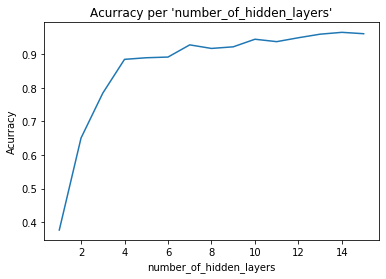


Parameters:

number_of_units_per_layer :	 15
activation_function :		 relu
loss_function :		 categorical_crossentropy
optimizer :		 sgd
epochs :		 50
batch_size :		 64


In [13]:
Plotter().plot(nnpt.acc_per_param, "number_of_hidden_layers")
print("\nParameters:\n")
for index, key in enumerate(nnpt.param_list.keys()):
    if key != "number_of_hidden_layers":
        if index == 1:
            print(key, ":\t", nnpt.param_list[key])
        if index != 1:
            print(key, ":\t\t", nnpt.param_list[key])

In [28]:
result = {}
t = {"val": ["ewqeqwe": 3]}
result.update(t)

SyntaxError: invalid syntax (<ipython-input-28-e575b7b19112>, line 2)